### All of Statistics: Chapter 1 - Probability

A few exercises from Wasserman's All of Statistics. I like this book for reference. It has a good level of detail but is not overly verbose.

##### Ex 1.21

Suppose a coin has a probability _p_ of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near _p_. Take _p_ = 0.3 and _n_ = 1000 and simulate _n_ coin flips. Plot the proportion of heads as a function of _n_. Repeat for _p_ = 0.03.

In [3]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=5)

In [5]:
"""
Set initial parameter values for the first part of the questionm where N is 1000 and p is 0.3
"""
n, p = 1000, 0.3

In [9]:
"""
Generate a sample of N flips, where each flip has probability p of coming up heads (denoted here by 1) and probability 1-p of coming up tails (denoted here by 0)
"""
def draw_vals(prob, N):
    sample = rng.binomial(1, prob, N)
    return sample

"""
DataFrame starts with column of results and an associated flip number. We then use an expanding window to add up how many heads we have seen to a given flip n.
Then, we get the current proportion of heads by dividing number of heads seen so far by the number of flips.
"""
def proportion(prob, N):
    df = pd.DataFrame({"result": draw_vals(prob, N), "n": np.arange(1, N+1)})
    df["heads"] = df["result"].expanding().sum()
    df["proportion"] = df["heads"]/df["n"]
    return df

<AxesSubplot:xlabel='n'>

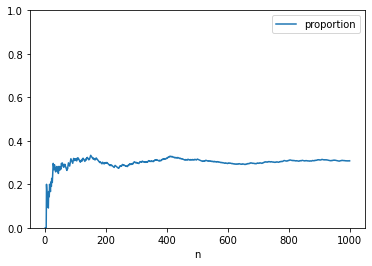

In [10]:
data = proportion(p, n)
data.plot(x="n", y="proportion", ylim = (0,1))

We can see that the proportion of heads in our sample settles close to the value _p_ as the number of flips increases. This is an illustration of the Law of Large Numbers. If we were told that this was the outcome of a large number of coin flips, but didn't know the probability _p_, we would rightly be suspicious that the coin was not fair.

<AxesSubplot:xlabel='n'>

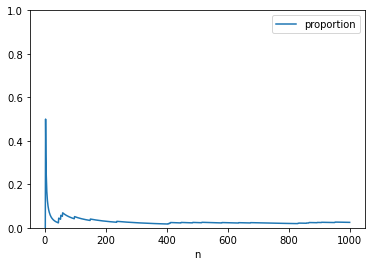

In [11]:
"""
Now let's set p = 0.03 and see how the overall picture looks similar, but tends close to the value 0.03.
"""

p = 0.03

data = proportion(p, n)
data.plot(x="n", y="proportion", ylim = (0,1))

##### Ex 1.22

Suppose we flip a coin _n_ times and let _p_ denote the probablity of heads. Let _X_ be the number of heads. _X_ will be a binomial random variable, given that it is the number of successes in a number of trials. Intuition suggests that _X_ will be close to _np_. To see if this is true, we can repeat the experiment many times and average the _X_ values. Carry out a simulation and compare the average of the _X_'s to _np_. Try this for _p_ = 0.3 and _n_ = (10, 100, 1000).

In [12]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=5)

In [ ]:
"""
Initially, we'll set the parameters p and n. We need to draw a binomial random variable from the corresponding distribution and record the value. 
We'll then repeat that m times, and average the m values to get our X_bar. That's what we'll compare to np.
"""

n, p = 10, 0.3
